In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('D:\\Coding journey 2024\\datascience\\05_Data gathering_eda\\datasets\\smartphones - smartphones.csv')

In [3]:
df.head()

,model,price,rating,sim,processor,ram,battery,display,camera,card,os
0,OnePlus 11 5G,"₹54,999",89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,OnePlus Nord CE 2 Lite 5G,"₹19,989",81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,Samsung Galaxy A14 5G,"₹16,499",75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
3,Motorola Moto G62 5G,"₹14,999",81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,Realme 10 Pro Plus,"₹24,999",82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 1080, Octa Core, 2.6 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13


## Data Assessing

### Quality Issues

1. **model** - some brands are written diiferently like OPPO in model column `consistency`
2. **price** - has unneccesary '₹' `validity`
3. **price** - has ',' between numbers `validity`
4. **price** - phone Namotel has a price of 99 `accuracy`
5. **ratings** - missing values `completeness`
6. **processor** - has some incorrect values for some samsung phones(row # -642,647,649,659,667,701,750,759,819,859,883,884,919,927,929,932,1002) `validity`
7. There is ipod on row 756 `validity`
8. **memory** - incorrect values in rows (441,485,534,553,584,610,613,642,647,649,659,667,701,750,759,819,859,884,919,927,929,932,990,1002) `validity`
9. **battery** - incorrect values in rows(113,151,309,365,378,441,450,553,584,610,613,630,642,647,649,659,667,701,750,756,759,764,819,855,859,884,915,916,927,929,932,990,1002) `validity`
10. **display** - sometimes frequency is not available `completeness`
11. **display** - incorrect values in rows(378,441,450,553,584,610,613,630,642,647,649,659,667,701,750,759,764,819,859,884,915,916,927,929,932,990,1002) `validity`
12. certain phones are foldable and the info is scattered `validity`
13. **camera** - words like Dual, Triple and Quad are used to represent number of cameras and front and rear cameras are separated by '&'
14. **camera** - problem with rows (100,113,151,157,161,238,273,308,309,323,324,365,367,378,394,441,450,484,506,534,553,571,572,575,584,610,613,615,630,642,647,649,659,667,684,687,705,711,723,728,750,756,759,764,792,819,846,854,855,858,883,884,896,915,916,927,929,932,945,956,990,995,1002,1016
) `validity`
15. **card** - sometimes contains info about os and camera `validity`
16. **os** - sometimes contains info about bluetooth and fm radio `validity`
17. **os** - issue with rows (324,378) `validity`
18. **os** - sometimes contains os version name like lollipop `consistency`
19. missing values in camera, card and os `completeness`
20. datatype  of price and rating is incorrect `validity`



### Tidiness Issues

1. **sim** - can be split into 3 cols has_5g, has_NFC, has_IR_Blaster
2. **ram** - can be split into 2 cols RAM and ROM
3. **processor** - can be split into processor name, cores and cpu speed.
4. **battery** - can be split into battery capacity, fast_charging_available
5. **display** - can be split into size, resolution_width, resolution_height and frequency
6. **camera** - can be split into front and rear camera
7. **card** - can be split into supported, extended_upto

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   model      1020 non-null   object 
 1   price      1020 non-null   object 
 2   rating     879 non-null    float64
 3   sim        1020 non-null   object 
 4   processor  1020 non-null   object 
 5   ram        1020 non-null   object 
 6   battery    1020 non-null   object 
 7   display    1020 non-null   object 
 8   camera     1019 non-null   object 
 9   card       1013 non-null   object 
 10  os         1003 non-null   object 
dtypes: float64(1), object(10)
memory usage: 87.8+ KB


In [5]:
df.describe()

,rating
count,879.000000
mean,78.258248
std,7.402854
min,60.000000
25%,74.000000
50%,80.000000
75%,84.000000
max,89.000000


In [6]:
df.duplicated().sum()

0

In [7]:
# make a copy
df1 = df.copy()

In [8]:
df1['price'] = df1['price'].str.replace('₹','').str.replace(',','').astype('int')

#price coloumn handling by removing rupees symbol and comma and converting it into integer so that we can run the analysis.

In [9]:
df1

,model,price,rating,sim,processor,ram,battery,display,camera,card,os
0,OnePlus 11 5G,54999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,OnePlus Nord CE 2 Lite 5G,19989,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,Samsung Galaxy A14 5G,16499,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
3,Motorola Moto G62 5G,14999,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,Realme 10 Pro Plus,24999,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 1080, Octa Core, 2.6 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13
...,...,...,...,...,...,...,...,...,...,...,...
1015,Motorola Moto Edge S30 Pro,34990,83.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 8 Gen1, Octa Core, 3 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 68.2W Fast Charging,"6.67 inches, 1080 x 2460 px, 120 Hz Display wi...",64 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Android v12,No FM Radio
1016,Honor X8 5G,14990,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 480+, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 22.5W Fast Charging,"6.5 inches, 720 x 1600 px Display with Water D...",48 MP + 2 MP + Depth Sensor Triple Rear & 8 MP...,"Memory Card Supported, upto 1 TB",Android v11
1017,POCO X4 GT 5G (8GB RAM + 256GB),28990,85.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...","Dimensity 8100, Octa Core, 2.85 GHz Processor","8 GB RAM, 256 GB inbuilt",5080 mAh Battery with 67W Fast Charging,"6.6 inches, 1080 x 2460 px, 144 Hz Display wit...",64 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Memory Card Not Supported,Android v12
1018,Motorola Moto G91 5G,19990,80.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.8 inches, 1080 x 2400 px Display with Punch ...",108 MP + 8 MP + 2 MP Triple Rear & 32 MP Front...,"Memory Card Supported, upto 1 TB",Android v12


In [10]:
df1 = df1.reset_index()
#reseting the index so that it can show values like excel in data frame

In [11]:
df1['index'] = df1['index'] + 2

In [62]:
df1

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
0,2,OnePlus 11 5G,54999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,3,OnePlus Nord CE 2 Lite 5G,19989,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,4,Samsung Galaxy A14 5G,16499,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
3,5,Motorola Moto G62 5G,14999,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,6,Realme 10 Pro Plus,24999,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 1080, Octa Core, 2.6 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13
...,...,...,...,...,...,...,...,...,...,...,...,...
1015,1017,Motorola Moto Edge S30 Pro,34990,83.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 8 Gen1, Octa Core, 3 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 68.2W Fast Charging,"6.67 inches, 1080 x 2460 px, 120 Hz Display wi...",64 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Memory Card Not Supported,Android v12
1016,1018,Honor X8 5G,14990,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 480+, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 22.5W Fast Charging,"6.5 inches, 720 x 1600 px Display with Water D...",48 MP + 2 MP + Depth Sensor Triple Rear & 8 MP...,"Memory Card Supported, upto 1 TB",Android v11
1017,1019,POCO X4 GT 5G (8GB RAM + 256GB),28990,85.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...","Dimensity 8100, Octa Core, 2.85 GHz Processor","8 GB RAM, 256 GB inbuilt",5080 mAh Battery with 67W Fast Charging,"6.6 inches, 1080 x 2460 px, 144 Hz Display wit...",64 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Memory Card Not Supported,Android v12
1018,1020,Motorola Moto G91 5G,19990,80.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.8 inches, 1080 x 2400 px Display with Punch ...",108 MP + 8 MP + 2 MP Triple Rear & 32 MP Front...,"Memory Card Supported, upto 1 TB",Android v12


In [63]:
#problematic rows
processor_rows = set((642,647,649,659,667,701,750,759,819,859,883,884,919,927,929,932,1002))
ram_rows = set((441,485,534,553,584,610,613,642,647,649,659,667,701,750,759,819,859,884,919,927,929,932,990,1002))
battery_rows = set((113,151,309,365,378,441,450,553,584,610,613,630,642,647,649,659,667,701,750,756,759,764,819,855,859,884,915,916,927,929,932,990,1002))
display_rows = set((378,441,450,553,584,610,613,630,642,647,649,659,667,701,750,759,764,819,859,884,915,916,927,929,932,990,1002))
camera_rows = set((100,113,151,157,161,238,273,308,309,323,324,365,367,378,394,441,450,484,506,534,553,571,572,575,584,610,613,615,630,642,647,649,659,667,684,687,705,711,723,728,750,756,759,764,792,819,846,854,855,858,883,884,896,915,916,927,929,932,945,956,990,995,1002,1016 ))

In [64]:
df1[df1['index'].isin(processor_rows | ram_rows | battery_rows | display_rows | camera_rows)]

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
98,100,Vivo X Fold 5G,106990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen1, Octa Core, 3 GHz Processor","12 GB RAM, 256 GB inbuilt",4600 mAh Battery with 66W Fast Charging,"8.03 inches, 1916 x 2160 px, 120 Hz Display",50 MP Quad Rear & 16 MP Front Camera,Memory Card Not Supported,Android v12
111,113,Apple iPhone 12,51999,74.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 64 GB inbuilt",None,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14
149,151,Apple iPhone 12 Mini,40999,74.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 64 GB inbuilt",None,"5.4 inches, 1080 x 2340 px Display",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14
159,161,Oppo Find N2 5G,94990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",4520 mAh Battery with 67W Fast Charging,"7.1 inches, 1792 x 1920 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 32 MP + 32...,Memory Card Not Supported,<NA>
236,238,Xiaomi Mix Fold 2 5G,106990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...","Snapdragon 8+ Gen1 , Octa Core, 3.2 GHz Proce...","12 GB RAM, 256 GB inbuilt",4500 mAh Battery with 67W Fast Charging,"8.02 inches, 1914 x 2160 px, 120 Hz Display wi...",50 MP + 13 MP + 8 MP Triple Rear & 20 MP Front...,Memory Card Not Supported,Android v12
306,308,Samsung Galaxy Z Flip 3,69999,84.0,"Single Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 888, Octa Core, 2.84 GHz Processor","8 GB RAM, 128 GB inbuilt",3300 mAh Battery with 15W Fast Charging,"6.7 inches, 1080 x 2640 px, 120 Hz Display wit...",12 MP + 12 MP Dual Rear & 10 MP Front Camera,Memory Card Not Supported,<NA>
307,309,Apple iPhone 12 (128GB),55999,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 128 GB inbuilt",None,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14
321,323,Samsung Galaxy Z Fold 4,154998,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",4400 mAh Battery with 25W Fast Charging,"7.6 inches, 1812 x 2176 px, 120 Hz Display wit...",50 MP + 12 MP + 10 MP Triple Rear & 10 MP + 4 ...,Memory Card Not Supported,Android v12
322,324,Royole FlexPai 2,109999,87.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 865, Octa Core, 2.84 GHz Processor","8 GB RAM, 128 GB inbuilt",4450 mAh Battery,"7.8 inches, 1440 x 1920 px Display",64 MP + 16 MP + 8 MP Triple Rear & 32 MP Front...,Memory Card Not Supported,<NA>
363,365,Apple iPhone 12 Mini (128GB),45999,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 128 GB inbuilt",None,"5.4 inches, 1080 x 2340 px Display",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14


In [65]:
df1[df1['index'].isin(processor_rows & ram_rows & battery_rows & display_rows & camera_rows)]

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os


In [15]:
df1 = df1[df1['price'] >= 3400]

In [16]:
df1

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
0,2,OnePlus 11 5G,54999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,3,OnePlus Nord CE 2 Lite 5G,19989,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,4,Samsung Galaxy A14 5G,16499,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
3,5,Motorola Moto G62 5G,14999,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,6,Realme 10 Pro Plus,24999,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 1080, Octa Core, 2.6 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13
...,...,...,...,...,...,...,...,...,...,...,...,...
1015,1017,Motorola Moto Edge S30 Pro,34990,83.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 8 Gen1, Octa Core, 3 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 68.2W Fast Charging,"6.67 inches, 1080 x 2460 px, 120 Hz Display wi...",64 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Android v12,No FM Radio
1016,1018,Honor X8 5G,14990,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 480+, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 22.5W Fast Charging,"6.5 inches, 720 x 1600 px Display with Water D...",48 MP + 2 MP + Depth Sensor Triple Rear & 8 MP...,"Memory Card Supported, upto 1 TB",Android v11
1017,1019,POCO X4 GT 5G (8GB RAM + 256GB),28990,85.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...","Dimensity 8100, Octa Core, 2.85 GHz Processor","8 GB RAM, 256 GB inbuilt",5080 mAh Battery with 67W Fast Charging,"6.6 inches, 1080 x 2460 px, 144 Hz Display wit...",64 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Memory Card Not Supported,Android v12
1018,1020,Motorola Moto G91 5G,19990,80.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.8 inches, 1080 x 2400 px Display with Punch ...",108 MP + 8 MP + 2 MP Triple Rear & 32 MP Front...,"Memory Card Supported, upto 1 TB",Android v12


In [66]:
df1[df1['index'].isin(processor_rows)]

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os


In [67]:
df1.drop([645,857,882,925],inplace=True)

KeyError: '[645, 857, 882, 925] not found in axis'

In [68]:
df1[df1['index'].isin(ram_rows)]

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
439,441,Apple iPhone SE 3 2022,43900,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor",64 GB inbuilt,None,"4.7 inches, 750 x 1334 px Display",12 MP Rear & 7 MP Front Camera,Memory Card Not Supported,iOS v15
483,485,Huawei Mate 50 RS Porsche Design,239999,81.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi, NFC, IR Blaster","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor",512 GB inbuilt,4700 mAh Battery with 66W Fast Charging,"6.74 inches, 1212 x 2616 px, 120 Hz Display",50 MP + 48 MP + 13 MP Triple Rear & 13 MP Fron...,"Memory Card (Hybrid), upto 256 GB",Hongmeng OS v3.0


In [69]:
df1.drop(582,inplace=True)

KeyError: '[582] not found in axis'

In [70]:
df1[df1['index'].isin(battery_rows)]

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
111,113,Apple iPhone 12,51999,74.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 64 GB inbuilt",None,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14
149,151,Apple iPhone 12 Mini,40999,74.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 64 GB inbuilt",None,"5.4 inches, 1080 x 2340 px Display",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14
307,309,Apple iPhone 12 (128GB),55999,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 128 GB inbuilt",None,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14
363,365,Apple iPhone 12 Mini (128GB),45999,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 128 GB inbuilt",None,"5.4 inches, 1080 x 2340 px Display",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14
439,441,Apple iPhone SE 3 2022,43900,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor",64 GB inbuilt,None,"4.7 inches, 750 x 1334 px Display",12 MP Rear & 7 MP Front Camera,Memory Card Not Supported,iOS v15
448,450,Apple iPhone 15 Pro,130990,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",Bionic A16,"8 GB RAM, 128 GB inbuilt",None,"6.06 inches, 1170 x 2532 px, 120 Hz Display wi...",50 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...,Memory Card Not Supported,iOS v15
628,630,Apple iPhone 12 Pro (512GB),139900,80.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","6 GB RAM, 512 GB inbuilt",None,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...,Memory Card Not Supported,iOS v14.0
762,764,Apple iPhone SE 4,49990,60.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor",64 GB inbuilt,None,"6.1 inches, 750 x 1580 px Display",12 MP Rear & 10.8 MP Front Camera,Memory Card Not Supported,iOS v16
853,855,Apple iPhone 12 Pro (256GB),119900,80.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","6 GB RAM, 256 GB inbuilt",None,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...,Memory Card Not Supported,iOS v14.0
913,915,Apple iPhone 12 Mini (256GB),55999,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 256 GB inbuilt",None,"5.4 inches, 1080 x 2340 px Display",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14


In [71]:
df1.drop([376,754],inplace=True)

KeyError: '[376, 754] not found in axis'

In [73]:
temp_df = df1[df1['index'].isin(battery_rows)]

In [74]:
x = temp_df.iloc[:,7:].shift(1,axis=1).values

In [75]:
df1.loc[temp_df.index,temp_df.columns[7:]] = x

In [76]:
df1[df1['index'].isin(display_rows)]

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
439,441,Apple iPhone SE 3 2022,43900,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor",64 GB inbuilt,None,None,"4.7 inches, 750 x 1334 px Display",12 MP Rear & 7 MP Front Camera,Memory Card Not Supported
448,450,Apple iPhone 15 Pro,130990,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",Bionic A16,"8 GB RAM, 128 GB inbuilt",None,None,"6.06 inches, 1170 x 2532 px, 120 Hz Display wi...",50 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...,Memory Card Not Supported
628,630,Apple iPhone 12 Pro (512GB),139900,80.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","6 GB RAM, 512 GB inbuilt",None,None,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...,Memory Card Not Supported
762,764,Apple iPhone SE 4,49990,60.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor",64 GB inbuilt,None,None,"6.1 inches, 750 x 1580 px Display",12 MP Rear & 10.8 MP Front Camera,Memory Card Not Supported
913,915,Apple iPhone 12 Mini (256GB),55999,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 256 GB inbuilt",None,None,"5.4 inches, 1080 x 2340 px Display",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported
914,916,Apple iPhone 12 (256GB),67999,76.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 256 GB inbuilt",None,None,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported


In [77]:
len(display_rows)

27

In [78]:
len(camera_rows)

64

In [79]:
df1[df1['index'].isin(camera_rows)]
# 155 271

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
98,100,Vivo X Fold 5G,106990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen1, Octa Core, 3 GHz Processor","12 GB RAM, 256 GB inbuilt",4600 mAh Battery with 66W Fast Charging,"8.03 inches, 1916 x 2160 px, 120 Hz Display",50 MP Quad Rear & 16 MP Front Camera,Memory Card Not Supported,Android v12
111,113,Apple iPhone 12,51999,74.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 64 GB inbuilt",None,None,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported
149,151,Apple iPhone 12 Mini,40999,74.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 64 GB inbuilt",None,None,"5.4 inches, 1080 x 2340 px Display",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported
159,161,Oppo Find N2 5G,94990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",4520 mAh Battery with 67W Fast Charging,"7.1 inches, 1792 x 1920 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 32 MP + 32...,Memory Card Not Supported,<NA>
236,238,Xiaomi Mix Fold 2 5G,106990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...","Snapdragon 8+ Gen1 , Octa Core, 3.2 GHz Proce...","12 GB RAM, 256 GB inbuilt",4500 mAh Battery with 67W Fast Charging,"8.02 inches, 1914 x 2160 px, 120 Hz Display wi...",50 MP + 13 MP + 8 MP Triple Rear & 20 MP Front...,Memory Card Not Supported,Android v12
306,308,Samsung Galaxy Z Flip 3,69999,84.0,"Single Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 888, Octa Core, 2.84 GHz Processor","8 GB RAM, 128 GB inbuilt",3300 mAh Battery with 15W Fast Charging,"6.7 inches, 1080 x 2640 px, 120 Hz Display wit...",12 MP + 12 MP Dual Rear & 10 MP Front Camera,Memory Card Not Supported,<NA>
307,309,Apple iPhone 12 (128GB),55999,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 128 GB inbuilt",None,None,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported
321,323,Samsung Galaxy Z Fold 4,154998,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",4400 mAh Battery with 25W Fast Charging,"7.6 inches, 1812 x 2176 px, 120 Hz Display wit...",50 MP + 12 MP + 10 MP Triple Rear & 10 MP + 4 ...,Memory Card Not Supported,Android v12
322,324,Royole FlexPai 2,109999,87.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 865, Octa Core, 2.84 GHz Processor","8 GB RAM, 128 GB inbuilt",4450 mAh Battery,"7.8 inches, 1440 x 1920 px Display",64 MP + 16 MP + 8 MP Triple Rear & 32 MP Front...,Memory Card Not Supported,<NA>
363,365,Apple iPhone 12 Mini (128GB),45999,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 128 GB inbuilt",None,None,"5.4 inches, 1080 x 2340 px Display",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported


In [80]:
df1.drop([155, 271],inplace=True)

KeyError: '[155, 271] not found in axis'

In [81]:
temp_df = df1[df1['index'].isin(camera_rows)]

In [82]:
temp_df = temp_df[~temp_df['camera'].str.contains('MP')]

In [83]:
df1.loc[temp_df.index, 'camera'] = temp_df['card'].values

df1.sample(4)


,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
625,627,OPPO A16,11999,69.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi","Helio G35, Octa Core, 2.3 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery,"6.52 inches, 720 x 1600 px Display with Water ...",13 MP + 2 MP + 2 MP Triple Rear & 8 MP Front C...,Memory Card Supported,Android v11
974,976,Realme GT 5G,30994,85.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 888 , Octa Core, 2.84 GHz Processor","8 GB RAM, 128 GB inbuilt",4500 mAh Battery with 65W Fast Charging,"6.43 inches, 1080 x 2400 px, 120 Hz Display wi...",64 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Memory Card Not Supported,Android v11
539,541,Xiaomi Redmi 10C (4GB RAM + 128GB),14990,73.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi","Snapdragon 680, Octa Core, 2.4 GHz Processor","4 GB RAM, 128 GB inbuilt",6000 mAh Battery with 18W Fast Charging,"6.7 inches, 720 x 1600 px Display with Water D...",50 MP + 2 MP Dual Rear & 5 MP Front Camera,"Memory Card Supported, upto 512 GB",Android v11
513,515,Realme Q5 5G,14990,78.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 60W Fast Charging,"6.6 inches, 1080 x 2412 px, 120 Hz Display wit...",50 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,Memory Card (Hybrid),Android v12


In [84]:
df1['card'].value_counts()

card
Memory Card Not Supported                                 351
Memory Card Supported, upto 1 TB                          171
Memory Card Supported, upto 512 GB                        105
Memory Card (Hybrid), upto 1 TB                            91
Memory Card Supported                                      89
Memory Card Supported, upto 256 GB                         87
Memory Card (Hybrid)                                       30
Memory Card (Hybrid), upto 256 GB                          13
Memory Card (Hybrid), upto 512 GB                          11
Memory Card Supported, upto 128 GB                          6
12 MP + 12 MP Dual Rear & 12 MP Front Camera                6
Memory Card Supported, upto 2 TB                            5
Memory Card Supported, upto 32 GB                           4
Memory Card (Hybrid), upto 128 GB                           3
Memory Card (Hybrid), upto 64 GB                            3
12 MP + 12 MP + 12 MP Triple Rear & 12 MP Front Camera      2
12 

In [85]:
temp_df = df1[df1['card'].str.contains('MP')]

In [86]:
df1.loc[temp_df.index,'card'] = 'Memory Card Not Supported'

In [87]:
df1['card'].value_counts()

card
Memory Card Not Supported              362
Memory Card Supported, upto 1 TB       171
Memory Card Supported, upto 512 GB     105
Memory Card (Hybrid), upto 1 TB         91
Memory Card Supported                   89
Memory Card Supported, upto 256 GB      87
Memory Card (Hybrid)                    30
Memory Card (Hybrid), upto 256 GB       13
Memory Card (Hybrid), upto 512 GB       11
Memory Card Supported, upto 128 GB       6
Memory Card Supported, upto 2 TB         5
Memory Card Supported, upto 32 GB        4
Memory Card (Hybrid), upto 128 GB        3
Memory Card (Hybrid), upto 64 GB         3
Memory Card Supported, upto 1000 GB      1
Memory Card (Hybrid), upto 2 TB          1
Name: count, dtype: int64

In [88]:
temp_df = df1[~df1['card'].str.contains('Memory Card')]

In [89]:
df1.loc[temp_df.index,'os'] = temp_df['card'].values

In [90]:
df1.loc[temp_df.index,'card'] = 'Memory Card Not Supported'

In [91]:
df1['card'].value_counts()

card
Memory Card Not Supported              362
Memory Card Supported, upto 1 TB       171
Memory Card Supported, upto 512 GB     105
Memory Card (Hybrid), upto 1 TB         91
Memory Card Supported                   89
Memory Card Supported, upto 256 GB      87
Memory Card (Hybrid)                    30
Memory Card (Hybrid), upto 256 GB       13
Memory Card (Hybrid), upto 512 GB       11
Memory Card Supported, upto 128 GB       6
Memory Card Supported, upto 2 TB         5
Memory Card Supported, upto 32 GB        4
Memory Card (Hybrid), upto 128 GB        3
Memory Card (Hybrid), upto 64 GB         3
Memory Card Supported, upto 1000 GB      1
Memory Card (Hybrid), upto 2 TB          1
Name: count, dtype: int64

In [92]:
df1['os'].value_counts()

os
Android v12                        394
Android v11                        274
Android v13                         91
Android v10                         69
Android v9.0 (Pie)                  29
Android v10.0                       23
iOS v16                             14
Memory Card Not Supported           11
iOS v15                             10
Android v8.1 (Oreo)                 10
iOS v13                              4
Android v8.0 (Oreo)                  4
Android v11.0                        4
iOS v15.0                            3
EMUI v12                             2
HarmonyOS v2.0                       2
Android v5.1.1 (Lollipop)            2
Android v6.0 (Marshmallow)           2
Harmony v2.0                         2
Android v12.1                        2
HarmonyOS                            1
RTOS (Series 30+)                    1
Android                              1
Hongmeng OS v4.0                     1
Android v7.1 (Nougat)                1
iOS v17               

In [95]:
df1['os'] = df1['os'].fillna('Unknown')





In [96]:
# Filter based on the 'os' column
temp_df = df1[df1['os'].str.contains('Memory card')]

In [97]:
df1.loc[temp_df.index,'os'] = np.nan

In [98]:
temp_df = df1[df1['os'] == 'Bluetooth']

In [99]:
df1.loc[temp_df.index,'os'] = np.nan

In [100]:
df1['os'].value_counts()

os
Android v12                        394
Android v11                        274
Android v13                         91
Android v10                         69
Android v9.0 (Pie)                  29
Android v10.0                       23
Unknown                             15
iOS v16                             14
Memory Card Not Supported           11
iOS v15                             10
Android v8.1 (Oreo)                 10
iOS v13                              4
Android v8.0 (Oreo)                  4
Android v11.0                        4
iOS v15.0                            3
EMUI v12                             2
HarmonyOS v2.0                       2
Android v5.1.1 (Lollipop)            2
Android v6.0 (Marshmallow)           2
Harmony v2.0                         2
Android v12.1                        2
HarmonyOS                            1
RTOS (Series 30+)                    1
Android                              1
Hongmeng OS v4.0                     1
Android v7.1 (Nougat) 

In [101]:
df1['os'] = df1['os'].replace(to_replace=r'.*Memory.*', value=np.nan, regex=True)

In [102]:
df1['os'].value_counts()

os
Android v12                        394
Android v11                        274
Android v13                         91
Android v10                         69
Android v9.0 (Pie)                  29
Android v10.0                       23
Unknown                             15
iOS v16                             14
iOS v15                             10
Android v8.1 (Oreo)                 10
iOS v13                              4
Android v8.0 (Oreo)                  4
Android v11.0                        4
iOS v15.0                            3
EMUI v12                             2
HarmonyOS v2.0                       2
Android v5.1.1 (Lollipop)            2
Android v6.0 (Marshmallow)           2
Harmony v2.0                         2
Android v12.1                        2
HarmonyOS                            1
RTOS (Series 30+)                    1
Android                              1
Hongmeng OS v4.0                     1
Android v7.1 (Nougat)                1
iOS v17               

In [104]:
df1.shape

df1

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
0,2,OnePlus 11 5G,54999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,3,OnePlus Nord CE 2 Lite 5G,19989,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,4,Samsung Galaxy A14 5G,16499,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
3,5,Motorola Moto G62 5G,14999,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,6,Realme 10 Pro Plus,24999,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 1080, Octa Core, 2.6 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13
...,...,...,...,...,...,...,...,...,...,...,...,...
1015,1017,Motorola Moto Edge S30 Pro,34990,83.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 8 Gen1, Octa Core, 3 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 68.2W Fast Charging,"6.67 inches, 1080 x 2460 px, 120 Hz Display wi...",64 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Memory Card Not Supported,Android v12
1016,1018,Honor X8 5G,14990,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 480+, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 22.5W Fast Charging,"6.5 inches, 720 x 1600 px Display with Water D...",48 MP + 2 MP + Depth Sensor Triple Rear & 8 MP...,"Memory Card Supported, upto 1 TB",Android v11
1017,1019,POCO X4 GT 5G (8GB RAM + 256GB),28990,85.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...","Dimensity 8100, Octa Core, 2.85 GHz Processor","8 GB RAM, 256 GB inbuilt",5080 mAh Battery with 67W Fast Charging,"6.6 inches, 1080 x 2460 px, 144 Hz Display wit...",64 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Memory Card Not Supported,Android v12
1018,1020,Motorola Moto G91 5G,19990,80.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.8 inches, 1080 x 2400 px Display with Punch ...",108 MP + 8 MP + 2 MP Triple Rear & 32 MP Front...,"Memory Card Supported, upto 1 TB",Android v12


In [106]:
df1['display'].value_counts()

display
6.67 inches, 1080 x 2400 px, 120 Hz Display with Punch Hole    54
6.5 inches, 720 x 1600 px Display with Water Drop Notch        36
6.7 inches, 1080 x 2412 px, 120 Hz Display with Punch Hole     25
6.52 inches, 720 x 1600 px Display with Water Drop Notch       23
6.5 inches, 1080 x 2400 px, 90 Hz Display with Punch Hole      22
                                                               ..
6 inches, 1440 x 2880 px Display                                1
6 inches, 1080 x 2340 px, 90 Hz Display with Punch Hole         1
6.73 inches, 1440 x 3412 px, 144 Hz Display with Punch Hole     1
6.58 inches, 1080 x 2400 px, 90 Hz Display with Punch Hole      1
6.8 inches, 1080 x 2400 px Display with Punch Hole              1
Name: count, Length: 343, dtype: int64

In [107]:
(982/1020)*100

96.27450980392157

In [108]:
df1

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
0,2,OnePlus 11 5G,54999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,3,OnePlus Nord CE 2 Lite 5G,19989,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,4,Samsung Galaxy A14 5G,16499,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
3,5,Motorola Moto G62 5G,14999,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,6,Realme 10 Pro Plus,24999,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 1080, Octa Core, 2.6 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13
...,...,...,...,...,...,...,...,...,...,...,...,...
1015,1017,Motorola Moto Edge S30 Pro,34990,83.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 8 Gen1, Octa Core, 3 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 68.2W Fast Charging,"6.67 inches, 1080 x 2460 px, 120 Hz Display wi...",64 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Memory Card Not Supported,Android v12
1016,1018,Honor X8 5G,14990,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 480+, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 22.5W Fast Charging,"6.5 inches, 720 x 1600 px Display with Water D...",48 MP + 2 MP + Depth Sensor Triple Rear & 8 MP...,"Memory Card Supported, upto 1 TB",Android v11
1017,1019,POCO X4 GT 5G (8GB RAM + 256GB),28990,85.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...","Dimensity 8100, Octa Core, 2.85 GHz Processor","8 GB RAM, 256 GB inbuilt",5080 mAh Battery with 67W Fast Charging,"6.6 inches, 1080 x 2460 px, 144 Hz Display wit...",64 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Memory Card Not Supported,Android v12
1018,1020,Motorola Moto G91 5G,19990,80.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.8 inches, 1080 x 2400 px Display with Punch ...",108 MP + 8 MP + 2 MP Triple Rear & 32 MP Front...,"Memory Card Supported, upto 1 TB",Android v12


In [109]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 982 entries, 0 to 1019
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   index      982 non-null    int64  
 1   model      982 non-null    object 
 2   price      982 non-null    int32  
 3   rating     879 non-null    float64
 4   sim        982 non-null    object 
 5   processor  982 non-null    object 
 6   ram        982 non-null    object 
 7   battery    971 non-null    object 
 8   display    971 non-null    object 
 9   camera     982 non-null    object 
 10  card       982 non-null    object 
 11  os         971 non-null    object 
dtypes: float64(1), int32(1), int64(1), object(9)
memory usage: 128.2+ KB


In [110]:
brand_names = df1['model'].str.split(' ').str.get(0)

In [111]:
df1.insert(1,'brand_name',brand_names)

In [112]:
df1['brand_name'] = df1['brand_name'].str.lower()

In [113]:
has_5g = df1['sim'].str.contains('5G')
has_nfc = df1['sim'].str.contains('NFC')
has_ir_blaster = df1['sim'].str.contains('IR Blaster')

In [115]:
df1.insert(6,'has_5g',has_5g)
df1.insert(7,'has_nfc',has_nfc)
df1.insert(8,'has_ir_blaster',has_ir_blaster)

ValueError: cannot insert has_5g, already exists

In [116]:
processor_name = df1['processor'].str.split(',').str.get(0)

In [117]:
num_cores = df1['processor'].str.split(',').str.get(1)

In [118]:
processor_speed = df1['processor'].str.split(',').str.get(2)

In [120]:
df1.insert(10,'processor_name',processor_name)
df1.insert(11,'num_cores',num_cores)
df1.insert(12,'processor_speed',processor_speed)



ValueError: cannot insert processor_name, already exists

In [121]:
df1.head()

,index,brand_name,model,price,rating,sim,has_5g,has_nfc,has_ir_blaster,processor,processor_name,num_cores,processor_speed,ram,battery,display,camera,card,os
0,2,oneplus,OnePlus 11 5G,54999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor",Snapdragon 8 Gen2,Octa Core,3.2 GHz Processor,"12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,3,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor",Snapdragon 695,Octa Core,2.2 GHz Processor,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,4,samsung,Samsung Galaxy A14 5G,16499,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Exynos 1330, Octa Core, 2.4 GHz Processor",Exynos 1330,Octa Core,2.4 GHz Processor,"4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
3,5,motorola,Motorola Moto G62 5G,14999,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor",Snapdragon 695,Octa Core,2.2 GHz Processor,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,6,realme,Realme 10 Pro Plus,24999,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Dimensity 1080, Octa Core, 2.6 GHz Processor",Dimensity 1080,Octa Core,2.6 GHz Processor,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13


In [122]:
df1['processor_name'] = df1['processor_name'].str.strip()

In [123]:
temp_df = df1[df1['processor_name'].str.contains('Core')][['processor_name', 'num_cores',	'processor_speed']].shift(1,axis=1)

In [126]:
temp_df.shape


,processor_name,num_cores,processor_speed
118,None,Octa Core Processor,NaN
143,None,Quad Core,1.4 GHz Processor
188,None,Quad Core,1.6 GHz Processor
201,None,Octa Core,2 GHz Processor
309,None,Octa Core,2 GHz Processor


In [127]:
df1.loc[temp_df.index,['processor_name', 'num_cores',	'processor_speed']] = temp_df.values

In [128]:
df1.loc[856]

index                                                858
brand_name                                       samsung
model                            Samsung Galaxy A01 Core
price                                               4999
rating                                               NaN
sim                       Dual Sim, 3G, 4G, VoLTE, Wi-Fi
has_5g                                             False
has_nfc                                            False
has_ir_blaster                                     False
processor          (28 nm), Quad Core, 1.5 GHz Processor
processor_name                                   (28 nm)
num_cores                                      Quad Core
processor_speed                        1.5 GHz Processor
ram                              1 GB RAM, 16 GB inbuilt
battery                                 3000 mAh Battery
display                5.3 inches, 720 x 1480 px Display
camera                     8 MP Rear & 5 MP Front Camera
card                           

In [129]:
df1.loc[856,'processor_name'] = 'Mediatek MT6739'

In [131]:
processor_brand = df1['processor_name'].str.split(' ').str.get(0).str.lower()


In [132]:
df1.insert(11,'processor_brand',processor_brand)

In [133]:
df1['num_cores'] = df1['num_cores'].str.strip()

In [134]:
df1['num_cores'] = df1['num_cores'].str.replace('Octa Core Processor','Octa Core').str.replace('Hexa Core Processor','Hexa Core')

In [135]:
df1['processor_speed'] = df1['processor_speed'].str.strip().str.split(' ').str.get(0).str.replace('\u2009',' ').str.split(' ').str.get(0).astype(float)

In [136]:
df1.head()

,index,brand_name,model,price,rating,sim,has_5g,has_nfc,has_ir_blaster,processor,processor_name,processor_brand,num_cores,processor_speed,ram,battery,display,camera,card,os
0,2,oneplus,OnePlus 11 5G,54999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor",Snapdragon 8 Gen2,snapdragon,Octa Core,3.2,"12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,3,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor",Snapdragon 695,snapdragon,Octa Core,2.2,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,4,samsung,Samsung Galaxy A14 5G,16499,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Exynos 1330, Octa Core, 2.4 GHz Processor",Exynos 1330,exynos,Octa Core,2.4,"4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
3,5,motorola,Motorola Moto G62 5G,14999,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor",Snapdragon 695,snapdragon,Octa Core,2.2,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,6,realme,Realme 10 Pro Plus,24999,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Dimensity 1080, Octa Core, 2.6 GHz Processor",Dimensity 1080,dimensity,Octa Core,2.6,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13


In [137]:
ram_capacity = df1['ram'].str.strip().str.split(',').str.get(0).str.findall(r'\b(\d+)\b').str.get(0)

In [138]:
df1.insert(16,'ram_capacity',ram_capacity)

In [ ]:
df1.head()

,index,brand_name,model,price,rating,sim,has_5g,has_nfc,has_ir_blaster,processor,processor_name,processor_brand,num_cores,processor_speed,ram,battery,ram_capacity,display,camera,card,os
0,2,oneplus,OnePlus 11 5G,54999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor",Snapdragon 8 Gen2,snapdragon,Octa Core,3.2,"12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,12,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,3,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor",Snapdragon 695,snapdragon,Octa Core,2.2,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,6,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,4,samsung,Samsung Galaxy A14 5G,16499,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Exynos 1330, Octa Core, 2.4 GHz Processor",Exynos 1330,exynos,Octa Core,2.4,"4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,4,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
3,5,motorola,Motorola Moto G62 5G,14999,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor",Snapdragon 695,snapdragon,Octa Core,2.2,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,6,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,6,realme,Realme 10 Pro Plus,24999,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Dimensity 1080, Octa Core, 2.6 GHz Processor",Dimensity 1080,dimensity,Octa Core,2.6,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,6,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13


In [139]:
internal_memory = df1['ram'].str.strip().str.split(',').str.get(1).str.strip().str.findall(r'\b(\d+)\b').str.get(0)

In [140]:
df1.insert(17,'internal_memory',internal_memory)

In [141]:
df1['ram_capacity'] = df1['ram_capacity'].astype(float)

In [142]:
df1.drop([486,627],inplace=True)

In [143]:
df1.loc[[483], ['ram_capacity','internal_memory']] = [12.0,'512']

In [144]:
df1['ram_capacity'].value_counts()

ram_capacity
8.0     339
6.0     234
4.0     215
12.0     86
3.0      54
2.0      32
16.0      9
1.0       7
18.0      2
64.0      2
Name: count, dtype: int64

In [146]:
df1['internal_memory'] = df1['internal_memory'].astype(float)

In [147]:
temp_df = df1[df1['internal_memory'] == 1]

In [148]:
df1.loc[temp_df.index,'internal_memory'] = 1024

In [149]:
df1['internal_memory'].value_counts()

internal_memory
128.0     523
64.0      191
256.0     157
32.0       67
512.0      22
16.0       12
1024.0      5
8.0         1
Name: count, dtype: int64

In [150]:
battery_capacity = df1['battery'].str.strip().str.split('with').str.get(0).str.strip().str.findall(r'\b(\d+)\b').str.get(0).astype(float)

In [151]:
df1.insert(16,'battery_capacity',battery_capacity)

In [152]:
fast_charging = df1['battery'].str.strip().str.split('with').str.get(1).str.strip().str.findall(r'\d{2,3}')

In [153]:
df1.insert(17,'fast_charging',fast_charging)

In [154]:
def fast_charging_extractor(item):

  if type(item) == list:
    if len(item) == 1:
      return item[0]
    else:
      return 0
  else:
    return -1

In [155]:
df1['fast_charging'] = df1['fast_charging'].apply(fast_charging_extractor).astype(int)

In [156]:
screen_size = df1['display'].str.strip().str.split(',').str.get(0).str.strip().str.split(' ').str.get(0).astype(float)

In [157]:
df1.insert(21,'screen_size',screen_size)

In [158]:
resolution = df1['display'].str.strip().str.split(',').str.get(1).str.strip().str.split('px').str.get(0)

In [159]:
df1.insert(22,'resolution',resolution)

In [160]:
refresh_rate = df1['display'].str.strip().str.split(',').str.get(2).str.strip().str.findall(r'\d{2,3}').str.get(0).apply(lambda x: 60 if pd.isna(x) else x).astype(int)

In [161]:
df1.insert(22,'refresh_rate',refresh_rate)

In [162]:
df1.head()

,index,brand_name,model,price,rating,sim,has_5g,has_nfc,has_ir_blaster,processor,...,fast_charging,ram_capacity,internal_memory,display,screen_size,refresh_rate,resolution,camera,card,os
0,2,oneplus,OnePlus 11 5G,54999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor",...,100,12.0,256.0,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",6.70,120,1440 x 3216,50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,3,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor",...,33,6.0,128.0,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",6.59,120,1080 x 2412,64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,4,samsung,Samsung Galaxy A14 5G,16499,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Exynos 1330, Octa Core, 2.4 GHz Processor",...,15,4.0,64.0,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",6.60,90,1080 x 2408,50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
3,5,motorola,Motorola Moto G62 5G,14999,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor",...,0,6.0,128.0,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",6.55,120,1080 x 2400,50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,6,realme,Realme 10 Pro Plus,24999,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Dimensity 1080, Octa Core, 2.6 GHz Processor",...,67,6.0,128.0,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",6.70,120,1080 x 2412,108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13


In [163]:
def camera_extractor(text):

  if 'Quad' in text:
    return '4'
  elif 'Triple' in text:
    return '3'
  elif 'Dual' in text:
    return '2'
  elif 'Missing' in text:
    return 'Missing'
  else:
    return '1'

In [164]:
num_rear_cameras = df1['camera'].str.strip().str.split('&').str.get(0).apply(camera_extractor)

In [165]:
df1.insert(25,'num_rear_cameras',num_rear_cameras)

In [166]:
num_front_cameras = df1['camera'].str.strip().str.split('&').str.get(1).str.strip().fillna('Missing').apply(camera_extractor)

In [167]:
df1.insert(26,'num_front_cameras',num_front_cameras)

In [168]:
df1.head()

,index,brand_name,model,price,rating,sim,has_5g,has_nfc,has_ir_blaster,processor,...,internal_memory,display,screen_size,refresh_rate,resolution,camera,num_rear_cameras,num_front_cameras,card,os
0,2,oneplus,OnePlus 11 5G,54999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor",...,256.0,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",6.70,120,1440 x 3216,50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,3,1,Memory Card Not Supported,Android v13
1,3,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor",...,128.0,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",6.59,120,1080 x 2412,64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,3,1,"Memory Card (Hybrid), upto 1 TB",Android v12
2,4,samsung,Samsung Galaxy A14 5G,16499,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Exynos 1330, Octa Core, 2.4 GHz Processor",...,64.0,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",6.60,90,1080 x 2408,50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,3,1,"Memory Card Supported, upto 1 TB",Android v13
3,5,motorola,Motorola Moto G62 5G,14999,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor",...,128.0,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",6.55,120,1080 x 2400,50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,3,1,"Memory Card (Hybrid), upto 1 TB",Android v12
4,6,realme,Realme 10 Pro Plus,24999,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Dimensity 1080, Octa Core, 2.6 GHz Processor",...,128.0,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",6.70,120,1080 x 2412,108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,3,1,Memory Card Not Supported,Android v13


In [169]:
df1[df1['num_front_cameras'] == 'Missing']

,index,brand_name,model,price,rating,sim,has_5g,has_nfc,has_ir_blaster,processor,...,internal_memory,display,screen_size,refresh_rate,resolution,camera,num_rear_cameras,num_front_cameras,card,os
69,71,oppo,Oppo Find N Fold,99990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor",...,256.0,"7.1 inches, 1792 x 1920 px, 120 Hz Display wit...",7.10,120,1792 x 1920,"Foldable Display, Dual Display",2,Missing,Memory Card Not Supported,Android v12
462,464,xiaomi,Xiaomi Mi Mix Alpha,199990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 855+, Octa Core, 2.96 GHz Processor",...,512.0,"7.92 inches, 2088 x 2250 px Display",7.92,60,2088 x 2250,108 MP + 20 MP + 12 MP Triple Rear Camera,3,Missing,Memory Card Not Supported,Android v10
993,995,huawei,Huawei Mate X,169000,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...",True,True,True,"Kirin 990, Octa Core, 2.86 GHz Processor",...,512.0,"8 inches, 2200 x 2480 px Display",8.00,60,2200 x 2480,48 MP Quad Rear Camera,4,Missing,Memory Card Not Supported,Unknown
1012,1014,itel,itel A23s,4787,NaN,"Dual Sim, 3G, 4G, Wi-Fi",False,False,False,"Spreadtrum SC9832E, Quad Core, 1.4 GHz Processor",...,32.0,"5 inches, 854 x 480 px Display",5.00,60,854 x 480,2 MP Rear Camera,1,Missing,Memory Card Not Supported,Android v11


In [170]:
pd.set_option('display.max_columns',None)

In [171]:
df1.head()

,index,brand_name,model,price,rating,sim,has_5g,has_nfc,has_ir_blaster,processor,processor_name,processor_brand,num_cores,processor_speed,ram,battery,battery_capacity,fast_charging,ram_capacity,internal_memory,display,screen_size,refresh_rate,resolution,camera,num_rear_cameras,num_front_cameras,card,os
0,2,oneplus,OnePlus 11 5G,54999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor",Snapdragon 8 Gen2,snapdragon,Octa Core,3.2,"12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,5000.0,100,12.0,256.0,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",6.70,120,1440 x 3216,50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,3,1,Memory Card Not Supported,Android v13
1,3,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor",Snapdragon 695,snapdragon,Octa Core,2.2,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,5000.0,33,6.0,128.0,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",6.59,120,1080 x 2412,64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,3,1,"Memory Card (Hybrid), upto 1 TB",Android v12
2,4,samsung,Samsung Galaxy A14 5G,16499,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Exynos 1330, Octa Core, 2.4 GHz Processor",Exynos 1330,exynos,Octa Core,2.4,"4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,5000.0,15,4.0,64.0,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",6.60,90,1080 x 2408,50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,3,1,"Memory Card Supported, upto 1 TB",Android v13
3,5,motorola,Motorola Moto G62 5G,14999,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor",Snapdragon 695,snapdragon,Octa Core,2.2,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,5000.0,0,6.0,128.0,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",6.55,120,1080 x 2400,50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,3,1,"Memory Card (Hybrid), upto 1 TB",Android v12
4,6,realme,Realme 10 Pro Plus,24999,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Dimensity 1080, Octa Core, 2.6 GHz Processor",Dimensity 1080,dimensity,Octa Core,2.6,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,5000.0,67,6.0,128.0,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",6.70,120,1080 x 2412,108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,3,1,Memory Card Not Supported,Android v13


In [172]:
#df1[df1['camera'] == 'Foldable Display, Dual Display']
df1.loc[69,'camera'] == '50 MP'

False

In [173]:
temp_df = df1[df1['camera'] == 'Foldable Display, Dual Display']

In [174]:
df1.loc[temp_df.index, 'camera'] = '50 MP'

In [175]:
df1['primary_camera_rear'] = df1['camera'].str.split(' ').str.get(0).str.replace('\u2009',' ').str.split(' ').str.get(0)

In [176]:
df1['primary_camera_front'] = df1['camera'].str.split('&').str.get(1).str.strip().str.split(' ').str.get(0).str.replace('\u2009',' ').str.split(' ').str.get(0)

In [177]:
df1.head()

,index,brand_name,model,price,rating,sim,has_5g,has_nfc,has_ir_blaster,processor,processor_name,processor_brand,num_cores,processor_speed,ram,battery,battery_capacity,fast_charging,ram_capacity,internal_memory,display,screen_size,refresh_rate,resolution,camera,num_rear_cameras,num_front_cameras,card,os,primary_camera_rear,primary_camera_front
0,2,oneplus,OnePlus 11 5G,54999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor",Snapdragon 8 Gen2,snapdragon,Octa Core,3.2,"12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,5000.0,100,12.0,256.0,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",6.70,120,1440 x 3216,50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,3,1,Memory Card Not Supported,Android v13,50,16
1,3,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor",Snapdragon 695,snapdragon,Octa Core,2.2,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,5000.0,33,6.0,128.0,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",6.59,120,1080 x 2412,64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,3,1,"Memory Card (Hybrid), upto 1 TB",Android v12,64,16
2,4,samsung,Samsung Galaxy A14 5G,16499,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Exynos 1330, Octa Core, 2.4 GHz Processor",Exynos 1330,exynos,Octa Core,2.4,"4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,5000.0,15,4.0,64.0,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",6.60,90,1080 x 2408,50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,3,1,"Memory Card Supported, upto 1 TB",Android v13,50,13
3,5,motorola,Motorola Moto G62 5G,14999,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor",Snapdragon 695,snapdragon,Octa Core,2.2,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,5000.0,0,6.0,128.0,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",6.55,120,1080 x 2400,50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,3,1,"Memory Card (Hybrid), upto 1 TB",Android v12,50,16
4,6,realme,Realme 10 Pro Plus,24999,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Dimensity 1080, Octa Core, 2.6 GHz Processor",Dimensity 1080,dimensity,Octa Core,2.6,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,5000.0,67,6.0,128.0,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",6.70,120,1080 x 2412,108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,3,1,Memory Card Not Supported,Android v13,108,16


In [178]:
df1[df1['card'] == 'Memory Card (Hybrid)']

,index,brand_name,model,price,rating,sim,has_5g,has_nfc,has_ir_blaster,processor,processor_name,processor_brand,num_cores,processor_speed,ram,battery,battery_capacity,fast_charging,ram_capacity,internal_memory,display,screen_size,refresh_rate,resolution,camera,num_rear_cameras,num_front_cameras,card,os,primary_camera_rear,primary_camera_front
25,27,samsung,Samsung Galaxy S20 FE 5G,31239,88.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Snapdragon 865, Octa Core, 2.84 GHz Processor",Snapdragon 865,snapdragon,Octa Core,2.84,"8 GB RAM, 128 GB inbuilt",4500 mAh Battery with Fast Charging,4500.0,0,8.0,128.0,"6.5 inches, 1080 x 2400 px, 120 Hz Display wit...",6.50,120,1080 x 2400,12 MP + 12 MP + 8 MP Triple Rear & 32 MP Front...,3,1,Memory Card (Hybrid),Android v10,12,32
80,82,motorola,Motorola Moto G72 4G,15999,83.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi, NFC",False,True,False,"Helio G99, Octa Core, 2.2 GHz Processor",Helio G99,helio,Octa Core,2.20,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,5000.0,33,6.0,128.0,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",6.55,120,1080 x 2400,108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,3,1,Memory Card (Hybrid),Android v12,108,16
147,149,samsung,Samsung Galaxy M34 5G,16999,84.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Exynos 1200, Octa Core, 2.4 GHz Processor",Exynos 1200,exynos,Octa Core,2.40,"6 GB RAM, 128 GB inbuilt",6000 mAh Battery with 25W Fast Charging,6000.0,25,6.0,128.0,"6.5 inches, 1080 x 2400 px, 120 Hz Display wit...",6.50,120,1080 x 2400,64 MP Quad Rear & 32 MP Front Camera,4,1,Memory Card (Hybrid),Android v12,64,32
151,153,motorola,Motorola Moto G52,11999,75.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi, NFC",False,True,False,"Snapdragon 680, Octa Core, 2.4 GHz Processor",Snapdragon 680,snapdragon,Octa Core,2.40,"4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 33W Fast Charging,5000.0,33,4.0,64.0,"6.6 inches, 2460 x 1080 px, 90 Hz Display with...",6.60,90,2460 x 1080,50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,3,1,Memory Card (Hybrid),Android v12,50,16
178,180,vivo,Vivo Y75 5G,21990,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Dimensity 700 5G, Octa Core, 2.2 GHz Processor",Dimensity 700 5G,dimensity,Octa Core,2.20,"8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 18W Fast Charging,5000.0,18,8.0,128.0,"6.58 inches, 1080 x 2408 px Display with Water...",6.58,60,1080 x 2408,50 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,3,1,Memory Card (Hybrid),Android v12,50,16
204,206,motorola,Motorola Moto G52 (6GB RAM + 128GB),12999,79.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi, NFC",False,True,False,"Snapdragon 680, Octa Core, 2.4 GHz Processor",Snapdragon 680,snapdragon,Octa Core,2.40,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,5000.0,33,6.0,128.0,"6.6 inches, 2460 x 1080 px, 90 Hz Display with...",6.60,90,2460 x 1080,50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,3,1,Memory Card (Hybrid),Android v12,50,16
248,250,motorola,Motorola Moto G73,25999,85.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Dimensity 930, Octa Core, 2.2 GHz Processor",Dimensity 930,dimensity,Octa Core,2.20,"8 GB RAM, 256 GB inbuilt",5000 mAh Battery with 30W Fast Charging,5000.0,30,8.0,256.0,"6.5 inches, 1080 x 2400 px, 120 Hz Display wit...",6.50,120,1080 x 2400,50 MP + 8 MP Dual Rear & 16 MP Front Camera,2,1,Memory Card (Hybrid),Android v13,50,16
254,256,xiaomi,Xiaomi Redmi Note 11 Pro 5G,17990,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, IR Blaster",True,False,True,"Snapdragon 695, Octa Core, 2.2 GHz Processor",Snapdragon 695,snapdragon,Octa Core,2.20,"6 GB RAM, 64 GB inbuilt",5000 mAh Battery with 67W Fast Charging,5000.0,67,6.0,64.0,"6.67 inches, 1080 x 2400 px, 120 Hz Display wi...",6.67,120,1080 x 2400,108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,3,1,Memory Card (Hybrid),Android v11,108,16
281,283,vivo,Vivo V23e 5G,21994,84.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Dimensity 810 5G, Octa Core, 2.4 GHz P

In [179]:
df1.loc[temp_df.index, 'card'] = 'Not Specified'

In [180]:
df1['extended_memory'] = df1['card'].apply(lambda x:'0' if 'Not' in x else x.split('upto')).str.get(-1).str.strip().str.replace('Memory Card Supported','Not Specified')

In [181]:
df1.head()

,index,brand_name,model,price,rating,sim,has_5g,has_nfc,has_ir_blaster,processor,processor_name,processor_brand,num_cores,processor_speed,ram,battery,battery_capacity,fast_charging,ram_capacity,internal_memory,display,screen_size,refresh_rate,resolution,camera,num_rear_cameras,num_front_cameras,card,os,primary_camera_rear,primary_camera_front,extended_memory
0,2,oneplus,OnePlus 11 5G,54999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor",Snapdragon 8 Gen2,snapdragon,Octa Core,3.2,"12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,5000.0,100,12.0,256.0,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",6.70,120,1440 x 3216,50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,3,1,Memory Card Not Supported,Android v13,50,16,0
1,3,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor",Snapdragon 695,snapdragon,Octa Core,2.2,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,5000.0,33,6.0,128.0,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",6.59,120,1080 x 2412,64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,3,1,"Memory Card (Hybrid), upto 1 TB",Android v12,64,16,1 TB
2,4,samsung,Samsung Galaxy A14 5G,16499,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Exynos 1330, Octa Core, 2.4 GHz Processor",Exynos 1330,exynos,Octa Core,2.4,"4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,5000.0,15,4.0,64.0,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",6.60,90,1080 x 2408,50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,3,1,"Memory Card Supported, upto 1 TB",Android v13,50,13,1 TB
3,5,motorola,Motorola Moto G62 5G,14999,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor",Snapdragon 695,snapdragon,Octa Core,2.2,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,5000.0,0,6.0,128.0,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",6.55,120,1080 x 2400,50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,3,1,"Memory Card (Hybrid), upto 1 TB",Android v12,50,16,1 TB
4,6,realme,Realme 10 Pro Plus,24999,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Dimensity 1080, Octa Core, 2.6 GHz Processor",Dimensity 1080,dimensity,Octa Core,2.6,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,5000.0,67,6.0,128.0,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",6.70,120,1080 x 2412,108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,3,1,Memory Card Not Supported,Android v13,108,16,0


In [183]:
df1['os'] = df1['os'].fillna(False)

In [184]:
temp_df = df1[df1['os'].astype(str).str.contains('Memory Card')]

In [189]:
df1.loc[temp_df.index, 'os'] = 'Not Specified'

In [190]:
df1['os'].value_counts()

os
Android v12                        394
Android v11                        274
Android v13                         91
Android v10                         69
Android v9.0 (Pie)                  29
Android v10.0                       23
Unknown                             14
iOS v16                             14
False                               11
Android v8.1 (Oreo)                 10
iOS v15                             10
iOS v13                              4
Android v8.0 (Oreo)                  4
Android v11.0                        4
iOS v15.0                            3
Android v12.1                        2
Android v5.1.1 (Lollipop)            2
Harmony v2.0                         2
HarmonyOS v2.0                       2
EMUI v12                             2
Android v6.0 (Marshmallow)           2
Android                              1
HarmonyOS                            1
Android v7.1 (Nougat)                1
Hongmeng OS v4.0                     1
iOS v12.3             

In [193]:

# Assuming df1 is your DataFrame
# Filter out rows where 'os' is boolean
df_filtered = df1[~df1['os'].astype(str).str.lower().isin(['false', 'true'])]

# Now you can continue with your desired operations on df_filtered


In [195]:
df1['os'].value_counts()

os
Android v12                        394
Android v11                        274
Android v13                         91
Android v10                         69
Android v9.0 (Pie)                  29
Android v10.0                       23
Unknown                             14
iOS v16                             14
False                               11
Android v8.1 (Oreo)                 10
iOS v15                             10
iOS v13                              4
Android v8.0 (Oreo)                  4
Android v11.0                        4
iOS v15.0                            3
Android v12.1                        2
Android v5.1.1 (Lollipop)            2
Harmony v2.0                         2
HarmonyOS v2.0                       2
EMUI v12                             2
Android v6.0 (Marshmallow)           2
Android                              1
HarmonyOS                            1
Android v7.1 (Nougat)                1
Hongmeng OS v4.0                     1
iOS v12.3             

In [199]:
def os_extractor(os_value):
    if isinstance(os_value, bool):
        return os_value  # Return the boolean value as is
    if 'Android' in os_value:
        return 'android'
    elif 'iOS' in os_value:
        return 'ios'
    elif 'Not Specified' in os_value:
        return os_value
    elif 'Harmony' in os_value or 'Hongmeng' in os_value or 'EMUI' in os_value:
        return 'other'


In [200]:
df1['os'] = df1['os'].apply(os_extractor)

In [202]:
export_df = df1.drop(columns=['index','sim','processor','ram','battery','display','camera','card'])

In [203]:
export_df.to_csv('smartphone_cleaned_v2.csv',index=False)

In [204]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [205]:
pd.set_option('display.max_columns',None)

In [206]:
df = pd.read_csv('D:\\Coding journey 2024\\datascience\\05_Data gathering_eda\\datasets\\smartphone_cleaned_v2.csv')

In [207]:
df.shape

(980, 24)

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   brand_name            980 non-null    object 
 1   model                 980 non-null    object 
 2   price                 980 non-null    int64  
 3   rating                879 non-null    float64
 4   has_5g                980 non-null    bool   
 5   has_nfc               980 non-null    bool   
 6   has_ir_blaster        980 non-null    bool   
 7   processor_name        960 non-null    object 
 8   processor_brand       960 non-null    object 
 9   num_cores             974 non-null    object 
 10  processor_speed       938 non-null    float64
 11  battery_capacity      969 non-null    float64
 12  fast_charging         980 non-null    int64  
 13  ram_capacity          980 non-null    float64
 14  internal_memory       978 non-null    float64
 15  screen_size           9

In [209]:
df.isnull().sum()

brand_name                0
model                     0
price                     0
rating                  101
has_5g                    0
has_nfc                   0
has_ir_blaster            0
processor_name           20
processor_brand          20
num_cores                 6
processor_speed          42
battery_capacity         11
fast_charging             0
ram_capacity              0
internal_memory           2
screen_size              11
refresh_rate              0
resolution               11
num_rear_cameras          0
num_front_cameras         0
os                       14
primary_camera_rear       0
primary_camera_front      4
extended_memory           0
dtype: int64

In [210]:
df['brand_name'].value_counts()

brand_name
xiaomi       134
samsung      132
vivo         111
realme        97
oppo          88
motorola      52
apple         46
oneplus       42
poco          41
tecno         33
iqoo          32
infinix       29
huawei        16
google        14
nokia         13
honor         13
itel          10
sony           9
asus           7
nubia          6
nothing        5
lava           4
jio            4
gionee         3
micromax       3
oukitel        3
lg             3
redmi          3
letv           3
ikall          3
royole         2
doogee         2
zte            2
lenovo         2
lyf            2
sharp          1
tcl            1
cat            1
leitz          1
duoqin         1
leeco          1
blu            1
vertu          1
tesla          1
cola           1
blackview      1
Name: count, dtype: int64

<Axes: xlabel='brand_name'>

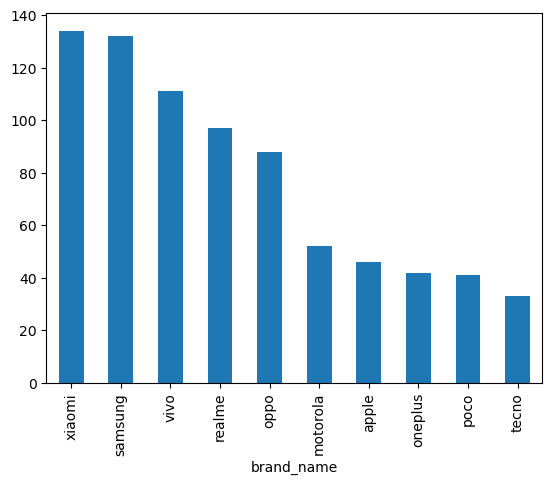

In [211]:
# top 10 phone brands
df['brand_name'].value_counts().head(10).plot(kind='bar')

In [212]:
# price col
df['price'].describe()

count       980.000000
mean      32520.504082
std       39531.812669
min        3499.000000
25%       12999.000000
50%       19994.500000
75%       35491.500000
max      650000.000000
Name: price, dtype: float64

c:\Users\One\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

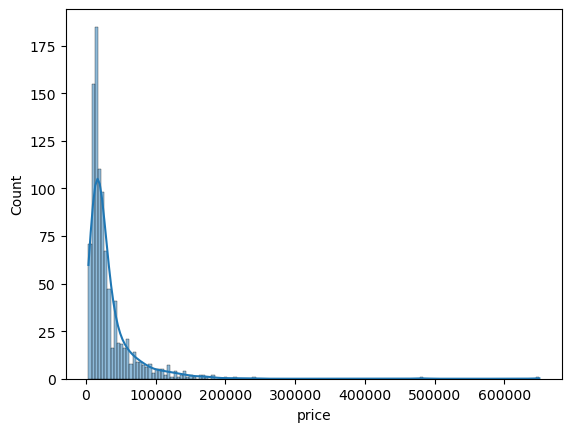

In [213]:
sns.histplot(df['price'],kde=True)

In [214]:
df['price'].skew()

6.591790999665567

<Axes: >

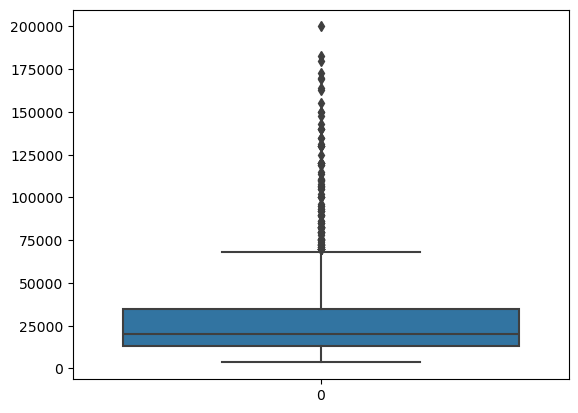

In [215]:
sns.boxplot(df[df['price']<200000]['price'])

In [216]:
df[df['price']>200000]

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_name,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,resolution,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory
427,vertu,Vertu Signature Touch,650000,62.0,False,True,False,Snapdragon 801,snapdragon,Octa Core,1.50,2275.0,-1,2.0,64.0,4.70,60,1080 x 1920,1,1,android,13.0,2.1,0
478,huawei,Huawei Mate 50 RS Porsche Design,239999,81.0,False,True,True,Snapdragon 8+ Gen1,snapdragon,Octa Core,3.20,4700.0,66,12.0,512.0,6.74,120,1212 x 2616,3,1,other,50.0,13,256 GB
887,xiaomi,Xiaomi Redmi K20 Pro Signature Edition,480000,88.0,False,True,False,Snapdragon 855,snapdragon,Octa Core,2.80,4000.0,27,8.0,256.0,6.39,60,1080 x 2340,3,1,android,48.0,20,0
951,huawei,Huawei Mate 30 RS Porsche Design,214990,NaN,True,True,True,Kirin 990,kirin,Octa Core,2.86,4500.0,0,12.0,512.0,6.53,60,1176 x 2400,4,2,android,40.0,32,256 GB


In [217]:
df['price'].isnull().sum()

0

In [218]:
df['rating'].describe()

count    879.000000
mean      78.258248
std        7.402854
min       60.000000
25%       74.000000
50%       80.000000
75%       84.000000
max       89.000000
Name: rating, dtype: float64

c:\Users\One\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='rating', ylabel='Count'>

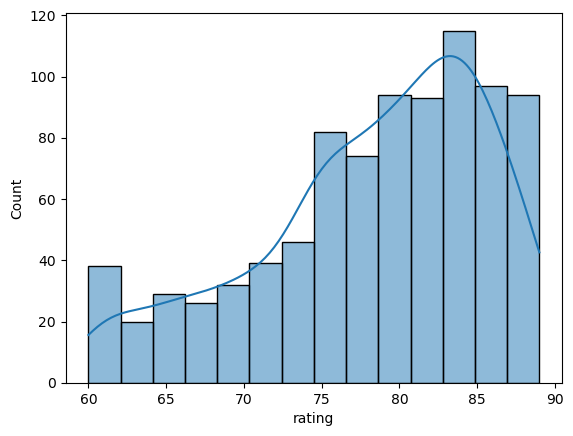

In [219]:
sns.histplot(df['rating'],kde=True)

In [220]:
df['rating'].skew()

-0.6989993034105535

<Axes: >

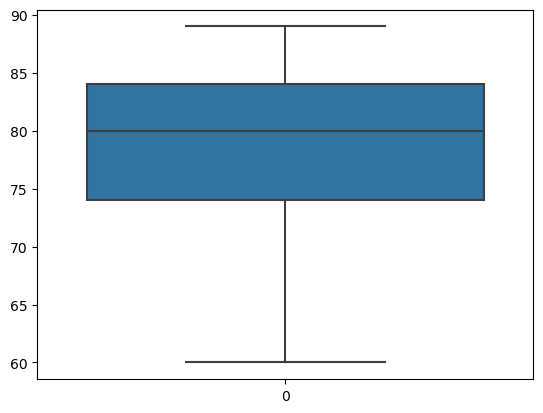

In [221]:
sns.boxplot(df['rating'])

In [222]:
df['rating'].isnull().sum()

101

<Axes: ylabel='count'>

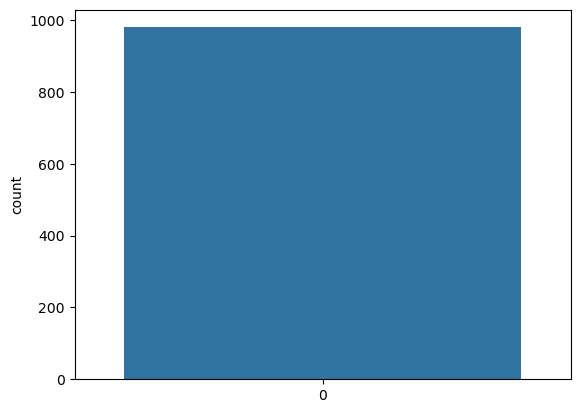

In [223]:
sns.countplot(df['has_5g'])

<Axes: ylabel='count'>

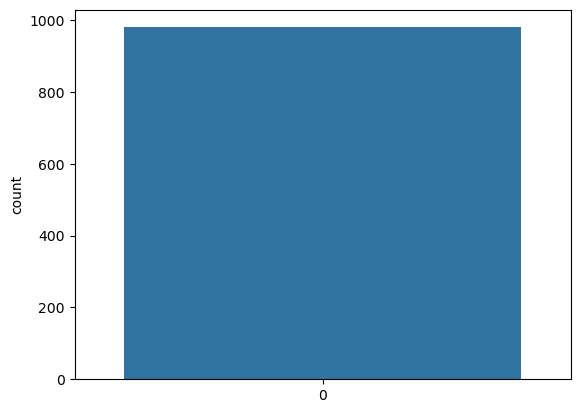

In [225]:
sns.countplot(df['has_nfc'])

In [226]:
df['has_nfc'].value_counts()

has_nfc
False    587
True     393
Name: count, dtype: int64

In [227]:
df['has_5g'].value_counts()

has_5g
True     549
False    431
Name: count, dtype: int64

<Axes: ylabel='count'>

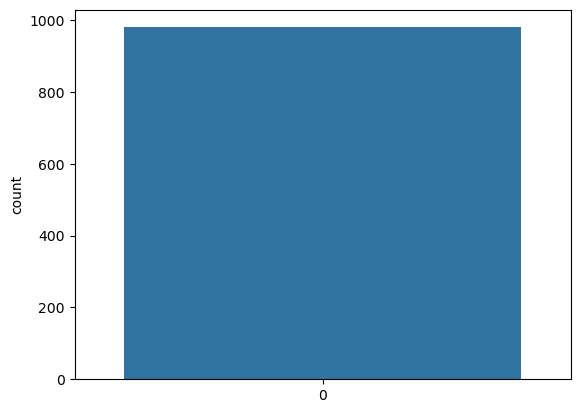

In [228]:
sns.countplot(df['has_ir_blaster'])

In [230]:
df['processor_brand'] = df['processor_brand'].str.replace('sanpdragon','snapdragon')
df['processor_brand'] = df['processor_brand'].str.replace('apple','bionic')
df['processor_brand'] = df['processor_brand'].str.replace('samsung','exynos')

In [231]:
temp_df = df[df['processor_brand'] == 'qualcomm']

In [232]:
df.loc[temp_df.index, 'processor_brand'] = 'snapdragon'

In [233]:
temp_df = df[df['processor_brand'] == 'a13']

In [234]:
df.loc[temp_df.index, 'processor_brand'] = 'bionic'

In [235]:
df['processor_brand'].value_counts()

processor_brand
snapdragon    413
helio         201
dimensity     177
exynos         50
bionic         45
unisoc         26
tiger          24
google          9
kirin           7
spreadtrum      4
sc9863a         2
fusion          1
mediatek        1
Name: count, dtype: int64

In [236]:
df[df['processor_brand'].isnull()]

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_name,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,resolution,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory
118,tesla,Tesla Pi Phone,69999,83.0,True,True,False,NaN,NaN,Octa Core,NaN,5000.0,120,16.0,512.0,6.73,165,1080 x 2448,3,1,android,50.0,32,0
143,jio,Jio Phone 3,4499,NaN,False,False,False,NaN,NaN,Quad Core,1.4,2800.0,-1,2.0,64.0,5.00,60,720 x 1280,1,1,android,5.0,2,128 GB
187,ikall,iKall Z19 Pro,8099,60.0,False,False,False,NaN,NaN,Quad Core,1.6,5000.0,-1,4.0,64.0,6.50,60,720 x 1600,1,1,android,13.0,8,128 GB
200,samsung,Samsung Galaxy A13,14450,75.0,False,False,False,NaN,NaN,Octa Core,2.0,5000.0,25,4.0,64.0,6.60,60,1080 x 2408,4,1,android,50.0,8,1 TB
307,samsung,Samsung Galaxy A13 (4GB RAM + 128GB),14999,75.0,False,False,False,NaN,NaN,Octa Core,2.0,5000.0,25,4.0,128.0,6.60,60,1080 x 2408,4,1,android,50.0,8,1 TB
313,itel,itel S16 Pro,6990,NaN,False,False,False,NaN,NaN,Quad Core,1.3,4000.0,-1,2.0,32.0,6.60,60,1600 x 720,3,1,android,8.0,8,32 GB
490,samsung,Samsung Galaxy A15,15990,63.0,False,False,False,NaN,NaN,Octa Core,NaN,5000.0,0,6.0,64.0,6.50,60,720 x 1600,3,1,android,48.0,8,1 TB
523,samsung,Samsung Galaxy F14,14990,67.0,False,True,False,NaN,NaN,Octa Core,NaN,5000.0,25,4.0,64.0,6.62,60,2408 x 1080,3,1,android,50.0,16,1 TB
575,samsung,Samsung Galaxy A13 (6GB RAM + 128GB),16499,78.0,False,False,False,NaN,NaN,Octa Core,2.0,5000.0,25,6.0,128.0,6.60,60,1080 x 2408,4,1,android,50.0,8,1 TB
733,ikall,iKall Z19,7999,61.0,False,False,False,NaN,NaN,Quad Core,1.6,5000.0,-1,4.0,32.0,6.50,60,720 x 1600,1,1,android,20.0,13,128 GB


In [237]:
df['num_cores'].value_counts()

num_cores
Octa Core    899
Hexa Core     39
Quad Core     36
Name: count, dtype: int64

In [238]:
df['processor_speed'].describe()

count    938.000000
mean       2.427217
std        0.464090
min        1.200000
25%        2.050000
50%        2.300000
75%        2.840000
max        3.220000
Name: processor_speed, dtype: float64

c:\Users\One\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


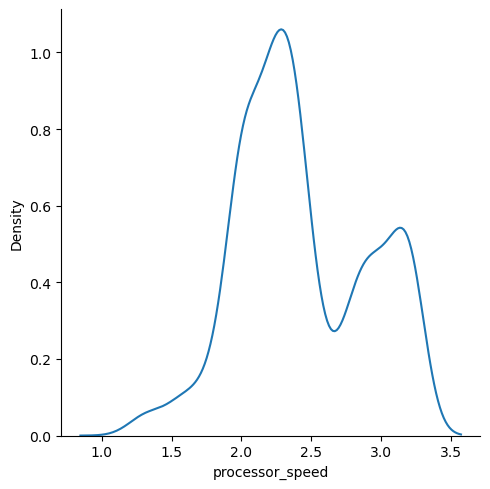

In [239]:
sns.displot(kind='kde',data=df,x='processor_speed')

In [240]:
df['processor_speed'].skew()

0.18833557463624606

<Axes: >

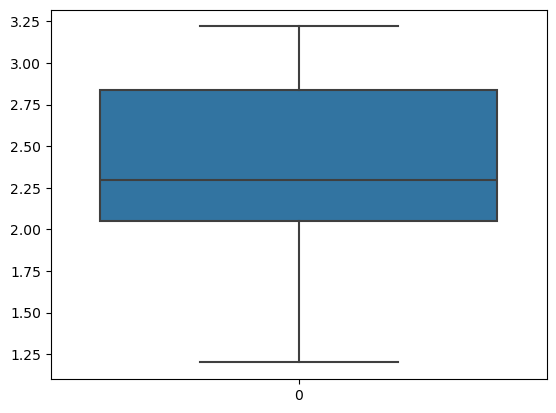

In [241]:
sns.boxplot(df['processor_speed'])

In [242]:
df['battery_capacity'].describe()

count      969.000000
mean      4817.748194
std       1009.540054
min       1821.000000
25%       4500.000000
50%       5000.000000
75%       5000.000000
max      22000.000000
Name: battery_capacity, dtype: float64

c:\Users\One\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


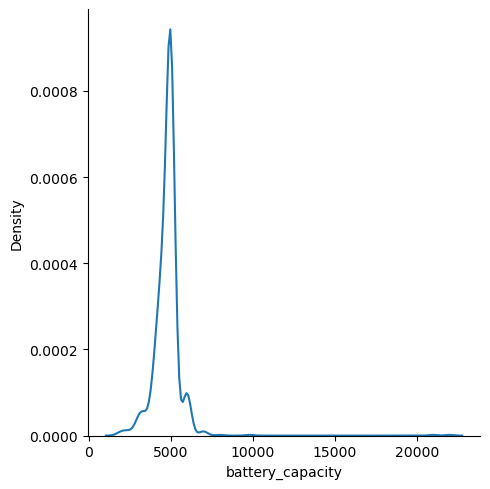

In [243]:
sns.displot(kind='kde',data=df,x='battery_capacity')

In [244]:
df[df['battery_capacity'] > 7000]

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_name,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,resolution,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory
391,oukitel,Oukitel WP19,29990,84.0,False,True,False,Helio G95,helio,Octa Core,2.0,21000.0,33,8.0,256.0,6.78,60,1080 x 2400,3,1,android,64.0,16,Not Specified
599,oukitel,Oukitel WP21,22990,82.0,False,False,False,Helio G99,helio,Octa Core,2.2,9800.0,66,12.0,256.0,6.78,120,1080 x 2400,3,1,NaN,64.0,Main,0
843,doogee,Doogee V Max,45999,88.0,True,False,False,Dimensity 1080,dimensity,Octa Core,2.6,22000.0,33,12.0,256.0,6.58,120,1080 x 2408,3,1,android,108.0,32,2 TB
966,oukitel,Oukitel WP9,25899,72.0,False,True,False,Helio P60,helio,Octa Core,2.0,8000.0,-1,6.0,128.0,5.86,60,720 x 1520,3,1,android,16.0,8,Not Specified


In [245]:
df['fast_charging'].describe()

count    980.000000
mean      36.048980
std       35.948034
min       -1.000000
25%       15.000000
50%       30.000000
75%       65.000000
max      240.000000
Name: fast_charging, dtype: float64

In [247]:
def fast(row):

    if row['fast_charging'] == -1:
      return 0
    else:
      return 1

In [248]:
df.columns

Index(['brand_name', 'model', 'price', 'rating', 'has_5g', 'has_nfc',
       'has_ir_blaster', 'processor_name', 'processor_brand', 'num_cores',
       'processor_speed', 'battery_capacity', 'fast_charging', 'ram_capacity',
       'internal_memory', 'screen_size', 'refresh_rate', 'resolution',
       'num_rear_cameras', 'num_front_cameras', 'os', 'primary_camera_rear',
       'primary_camera_front', 'extended_memory'],
      dtype='object')

In [249]:
x = df.apply(fast,axis=1)
df.insert(12,'fast_charging_available',x)

In [250]:
df['fast_charging'] = df['fast_charging'].apply(lambda x:np.nan if x == 0 or x == -1 else x)

In [251]:
df['ram_capacity'].value_counts()

ram_capacity
8.0     339
6.0     234
4.0     215
12.0     86
3.0      54
2.0      32
16.0      9
1.0       7
18.0      2
64.0      2
Name: count, dtype: int64

In [252]:
temp_df = df[df['internal_memory'].isnull()]

In [253]:
df.loc[temp_df.index,['ram_capacity','internal_memory']] = [[4,64],[4,64]]

In [254]:
df['internal_memory'].value_counts()

internal_memory
128.0     523
64.0      193
256.0     157
32.0       67
512.0      22
16.0       12
1024.0      5
8.0         1
Name: count, dtype: int64

In [255]:
df['screen_size'].describe()

count    969.000000
mean       6.545377
std        0.338109
min        3.540000
25%        6.500000
50%        6.580000
75%        6.670000
max        8.030000
Name: screen_size, dtype: float64

c:\Users\One\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


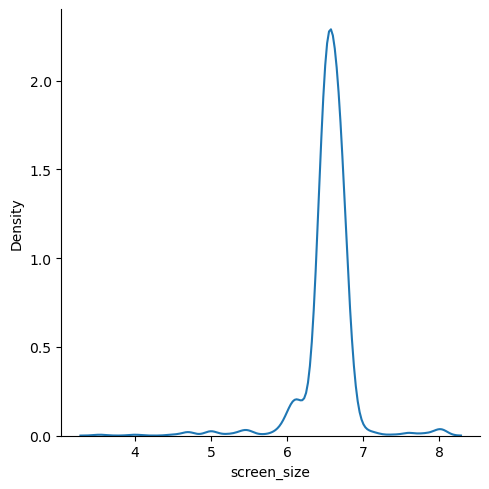

In [256]:
sns.displot(kind='kde',data=df,x='screen_size')

In [257]:
df['screen_size'].skew()

-2.133428684108758

<Axes: >

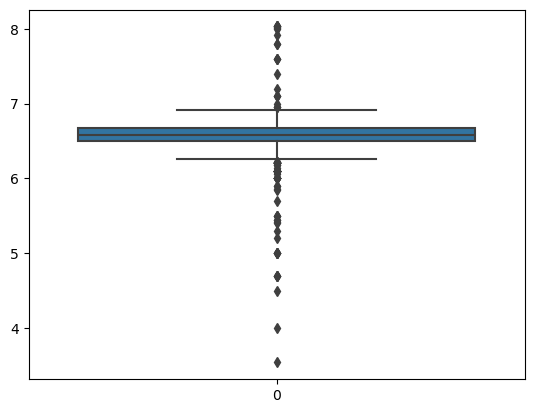

In [258]:
sns.boxplot(df['screen_size'])

In [259]:
df['extended_memory'].value_counts()

extended_memory
0                       362
1 TB                    262
512 GB                  116
256 GB                  100
Not Specified            88
Memory Card (Hybrid)     30
128 GB                    9
2 TB                      6
32 GB                     3
64 GB                     3
1000 GB                   1
Name: count, dtype: int64

In [260]:
  df['extended_memory_available'] = df['extended_memory'].apply(lambda x:0 if x == '0' else 1)

In [261]:
def extended_extractor(row):

  if row['extended_memory_available'] == 0:
    return np.nan
  else:
    if row['extended_memory'] == '1 TB':
      return 1024
    elif row['extended_memory'] == '512 GB':
      return 512
    elif row['extended_memory'] == '256 GB':
      return 256
    elif row['extended_memory'] == 'Not Specified':
      return np.nan
    elif row['extended_memory'] == 'Memory Card (Hybrid)':
      return np.nan
    elif row['extended_memory'] == '128 GB':
      return 128
    elif row['extended_memory'] == '2 TB':
      return 2048
    elif row['extended_memory'] == '32 GB':
      return 32
    elif row['extended_memory'] == '64 GB':
      return 64
    elif row['extended_memory'] == '1000 GB':
      return 1000
    
    
    

In [262]:
def extended_extractor(row):

  if row['extended_memory_available'] == 0:
    return np.nan
  else:
    if row['extended_memory'] == 'Not Specified':
      return np.nan
    elif row['extended_memory'] == 'Memory Card (Hybrid)':
      return np.nan
    else:
      return row['extended_memory']

    
    
    

In [263]:
df['extended_memory']

0         0
1      1 TB
2      1 TB
3      1 TB
4         0
       ... 
975       0
976    1 TB
977       0
978    1 TB
979    1 TB
Name: extended_memory, Length: 980, dtype: object

In [264]:
x = df.apply(extended_extractor,axis=1).str.replace('\u2009',' ').str.split(' ').str.get(0)

In [265]:
df['extended_memory_available']

0      0
1      1
2      1
3      1
4      0
      ..
975    0
976    1
977    0
978    1
979    1
Name: extended_memory_available, Length: 980, dtype: int64

In [266]:
df['extended_upto'] = x

In [267]:
df['extended_upto'].value_counts()

extended_upto
1       262
512     116
256     100
128       9
2         6
32        3
64        3
1000      1
Name: count, dtype: int64

In [268]:
def transform(text):

  if text == '1':
    return '1024'
  elif text == '2':
    return '2048'
  elif text == '1000':
    return '1024'
  else:
    return text

In [269]:
df['extended_upto'] = df['extended_upto'].apply(transform)

In [270]:
df['os']

0      android
1      android
2      android
3      android
4      android
        ...   
975    android
976    android
977    android
978    android
979    android
Name: os, Length: 980, dtype: object

In [274]:
def os_transform(text):
    if pd.isna(text):  # Check if the value is NaN
        return np.nan  # Return NaN as is
    elif 'Memory' in text:
        return np.nan
    elif 'android' in text:
        return text
    elif 'ios' in text:
        return text
    else:
        return 'other'

In [275]:
df['os'] = df['os'].apply(os_transform)

In [276]:
df['extended_upto'].value_counts()

extended_upto
1024    263
512     116
256     100
128       9
2048      6
32        3
64        3
Name: count, dtype: int64

In [277]:
df.drop(columns=['processor_name','extended_memory'],inplace=True)

In [278]:
df.isnull().sum()

brand_name                     0
model                          0
price                          0
rating                       101
has_5g                         0
has_nfc                        0
has_ir_blaster                 0
processor_brand               20
num_cores                      6
processor_speed               42
battery_capacity              11
fast_charging_available        0
fast_charging                211
ram_capacity                   0
internal_memory                0
screen_size                   11
refresh_rate                   0
resolution                    11
num_rear_cameras               0
num_front_cameras              0
os                            14
primary_camera_rear            0
primary_camera_front           4
extended_memory_available      0
extended_upto                480
dtype: int64

In [291]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

In [292]:
df.corr()['rating']

ValueError: could not convert string to float: 'oneplus'

In [293]:
df['primary_camera_front'].value_counts()

primary_camera_front
16      307
8       178
32      155
5       119
12       50
13       41
20       37
10       24
50       12
60       10
44        8
40        6
2         5
7         5
24        3
25        3
10.8      3
48        2
11.1      2
0.3       1
2.1       1
Main      1
10.7      1
10.1      1
12.6      1
Name: count, dtype: int64

In [294]:
df['primary_camera_front'] = df['primary_camera_front'].apply(lambda x: np.nan if x == 'Main' else x).astype(float)

In [295]:
df['num_cores'].value_counts()

num_cores
Octa Core    899
Hexa Core     39
Quad Core     36
Name: count, dtype: int64

In [296]:
df['num_cores'] = df['num_cores'].str.replace('Octa Core','8')
df['num_cores'] = df['num_cores'].str.replace('Hexa Core','6')
df['num_cores'] = df['num_cores'].str.replace('Quad Core','4')

In [297]:
df.to_csv('smartphone_cleaned_v4.csv',index=False)

In [298]:
new_df = pd.read_csv('D:\\Coding journey 2024\\datascience\\05_Data gathering_eda\\datasets\\smartphone_cleaned_v4.csv')

In [299]:
new_df[['brand_name','model','processor_brand']]

,brand_name,model,processor_brand
0,oneplus,OnePlus 11 5G,snapdragon
1,oneplus,OnePlus Nord CE 2 Lite 5G,snapdragon
2,samsung,Samsung Galaxy A14 5G,exynos
3,motorola,Motorola Moto G62 5G,snapdragon
4,realme,Realme 10 Pro Plus,dimensity
...,...,...,...
975,motorola,Motorola Moto Edge S30 Pro,snapdragon
976,honor,Honor X8 5G,snapdragon
977,poco,POCO X4 GT 5G (8GB RAM + 256GB),dimensity
978,motorola,Motorola Moto G91 5G,snapdragon


In [301]:
new_df['num_cores'] = new_df['num_cores'].astype(float)

In [302]:
new_df.isnull().sum()

brand_name                     0
model                          0
price                          0
rating                       101
has_5g                         0
has_nfc                        0
has_ir_blaster                 0
processor_brand               20
num_cores                      6
processor_speed               42
battery_capacity              11
fast_charging_available        0
fast_charging                211
ram_capacity                   0
internal_memory                0
screen_size                   11
refresh_rate                   0
resolution                    11
num_rear_cameras               0
num_front_cameras              0
os                            14
primary_camera_rear            0
primary_camera_front           5
extended_memory_available      0
extended_upto                480
dtype: int64

In [303]:

new_df.to_csv('smartphone_cleaned_v5.csv',index=False)

In [304]:
new_df.select_dtypes(include=['object'])

,brand_name,model,processor_brand,resolution,num_front_cameras,os
0,oneplus,OnePlus 11 5G,snapdragon,1440 x 3216,1,android
1,oneplus,OnePlus Nord CE 2 Lite 5G,snapdragon,1080 x 2412,1,android
2,samsung,Samsung Galaxy A14 5G,exynos,1080 x 2408,1,android
3,motorola,Motorola Moto G62 5G,snapdragon,1080 x 2400,1,android
4,realme,Realme 10 Pro Plus,dimensity,1080 x 2412,1,android
...,...,...,...,...,...,...
975,motorola,Motorola Moto Edge S30 Pro,snapdragon,1080 x 2460,1,android
976,honor,Honor X8 5G,snapdragon,720 x 1600,1,android
977,poco,POCO X4 GT 5G (8GB RAM + 256GB),dimensity,1080 x 2460,1,android
978,motorola,Motorola Moto G91 5G,snapdragon,1080 x 2400,1,android


In [305]:
new_df = pd.read_csv('D:\\Coding journey 2024\\datascience\\05_Data gathering_eda\\datasets\\smartphone_cleaned_v5_sir.csv')